# Plotting and comparing trap average PDFs to seasonal water column PDFs

In [103]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
from scipy.stats import gaussian_kde, wasserstein_distance
from scipy.spatial.distance import jensenshannon

Importing data

In [104]:
water_SM = pd.read_csv('../../data/LISST/corrected_GSDs/SM23_WC_normalized_GSD_corrected.csv')
trap_SM = pd.read_csv('../../data/sediment_traps/SM23_trap_normalized_GSD_LISST.csv')
water_SP = pd.read_csv('../../data/LISST/corrected_GSDs/SP23_WC_normalized_GSD_corrected.csv')
trap_SP = pd.read_csv('../../data/sediment_traps/SP23_trap_normalized_GSD_LISST.csv')

# getting information
grain_sizes = np.array(water_SM.iloc[:, 0])
water_SM_array = np.array(water_SM.iloc[:, 1:]) # spring water column
trap_SM_array = np.array(trap_SM.iloc[:, 1:]) # spring sediment traps
water_SP_array = np.array(water_SP.iloc[:, 1:]) # summer water column
trap_SP_array = np.array(trap_SP.iloc[:, 1:]) # summer sediment traps

Calculations

In [105]:
# calculating max, avg and min GSDs of the water columns
spring_wc_gsd_max = pd.DataFrame(np.max(water_SP_array, axis=1))
spring_wc_gsd_avg = pd.DataFrame(np.mean(water_SP_array, axis=1))
spring_wc_gsd_min = pd.DataFrame(np.min(water_SP_array, axis=1))
summer_wc_gsd_max = pd.DataFrame(np.max(water_SM_array, axis=1))
summer_wc_gsd_avg = pd.DataFrame(np.mean(water_SM_array, axis=1))
summer_wc_gsd_min = pd.DataFrame(np.min(water_SM_array, axis=1))
# calculating max, avg and min GSDs of the baskets
spring_st_gsd_max = pd.DataFrame(np.max(trap_SP_array, axis=1))
spring_st_gsd_avg = pd.DataFrame(np.mean(trap_SP_array, axis=1))
spring_st_gsd_min = pd.DataFrame(np.min(trap_SP_array, axis=1))
summer_st_gsd_max = pd.DataFrame(np.max(trap_SM_array, axis=1))
summer_st_gsd_avg = pd.DataFrame(np.mean(trap_SM_array, axis=1))
summer_st_gsd_min = pd.DataFrame(np.min(trap_SM_array, axis=1))

# calculating standard deviations of water columns and traps
spring_wc_gsd_std = pd.DataFrame(np.std(water_SP_array, axis=1))
summer_wc_gsd_std = pd.DataFrame(np.std(water_SM_array, axis=1))
spring_st_gsd_std = pd.DataFrame(np.std(trap_SP_array, axis=1))
summer_st_gsd_std = pd.DataFrame(np.std(trap_SM_array, axis=1))

# calculating percentiles of the water columns 
spring_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SP_array, 90, axis=1))
spring_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SP_array, 10, axis=1))
summer_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SM_array, 90, axis=1))
summer_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SM_array, 10, axis=1))
# calculating percentiles of the sediment traps
spring_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SP_array, 90, axis=1))
spring_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SP_array, 10, axis=1))
summer_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SM_array, 90, axis=1))
summer_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SM_array, 10, axis=1))


In [106]:
# add max, avg, std and min GSDs to the dataframes as new columns
water_SP["max"] = spring_wc_gsd_max
water_SP["avg"] = spring_wc_gsd_avg
water_SP["min"] = spring_wc_gsd_min
water_SP["std"] = spring_wc_gsd_std
water_SM["max"] = summer_wc_gsd_max
water_SM["avg"] = summer_wc_gsd_avg
water_SM["min"] = summer_wc_gsd_min
water_SM["std"] = summer_wc_gsd_std

trap_SP['max'] = spring_st_gsd_max
trap_SP['avg'] = spring_st_gsd_avg
trap_SP['min'] = spring_st_gsd_min
trap_SP['std'] = spring_st_gsd_std
trap_SM['max'] = summer_st_gsd_max
trap_SM['avg'] = summer_st_gsd_avg
trap_SM['min'] = summer_st_gsd_min
trap_SM['std'] = summer_st_gsd_std

# adding the percentiles to the dataframes as well
water_SP['d90'] = spring_wc_gsd_d90
water_SP['d10'] = spring_wc_gsd_d10
water_SM['d90'] = summer_wc_gsd_d90
water_SM['d10'] = summer_wc_gsd_d10
trap_SP['d90'] = spring_st_gsd_d90
trap_SP['d10'] = spring_st_gsd_d10
trap_SM['d90'] = summer_st_gsd_d90
trap_SM['d10'] = summer_st_gsd_d10

In [107]:
# loop to delete all variables that start with "summer" and "spring"
for var in list(globals().keys()):
    if var.startswith("summer") or var.startswith("spring"):
        del globals()[var]

### Plotting PDFs

#### Spring

Min and Max

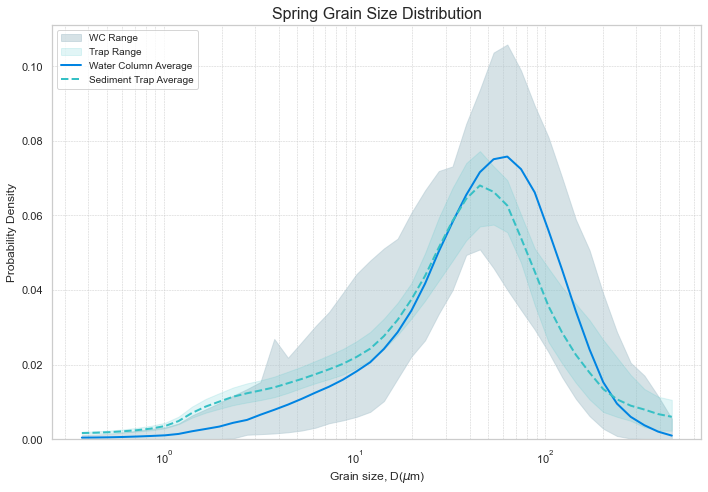

In [65]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP['min'], water_SP['max'], color='#AEC6CF', alpha=0.5, label='WC Range')
ax.fill_between(grain_sizes, trap_SP['min'], trap_SP['max'], color="#36C0C5", alpha=0.15, label='Trap Range')

# plot the average lines
ax.plot(grain_sizes, water_SP['avg'], color="#0084E2", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SP['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Spring Grain Size Distribution', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Standard Deviation

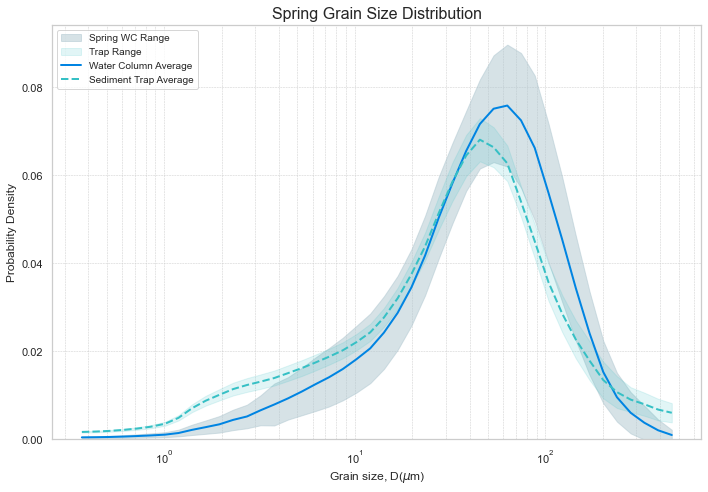

In [66]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# range is standard deviation
ax.fill_between(grain_sizes, water_SP['avg']-water_SP['std'], water_SP['avg']+ water_SP['std'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, trap_SP['avg']-trap_SP['std'], trap_SP['avg']+trap_SP['std'], color="#36C0C5", alpha=0.15, label='Trap Range')
# plot the average lines
ax.plot(grain_sizes, water_SP['avg'], color="#0084E2", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SP['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Spring Grain Size Distribution', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Percentiles

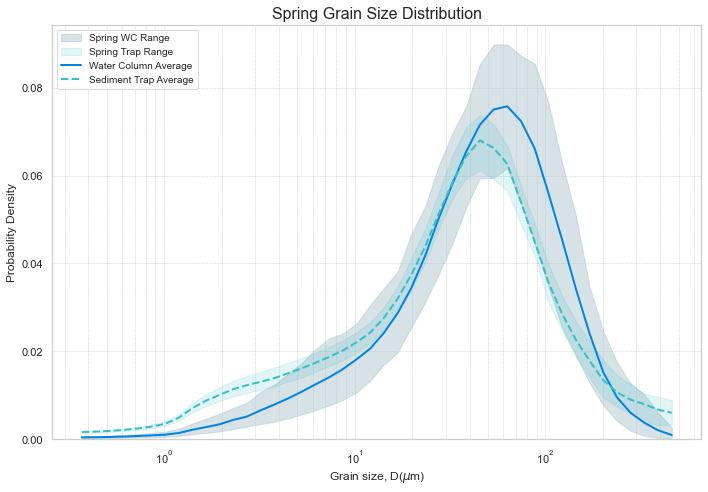

In [67]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# range is standard deviation
ax.fill_between(grain_sizes, water_SP['d10'], water_SP['d90'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, trap_SP['d10'], trap_SP['d90'], color="#36C0C5", alpha=0.15, label='Spring Trap Range')
# plot the average lines
ax.plot(grain_sizes, water_SP['avg'], color="#0084E2", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SP['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Spring Grain Size Distribution', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Summer

Min and Max

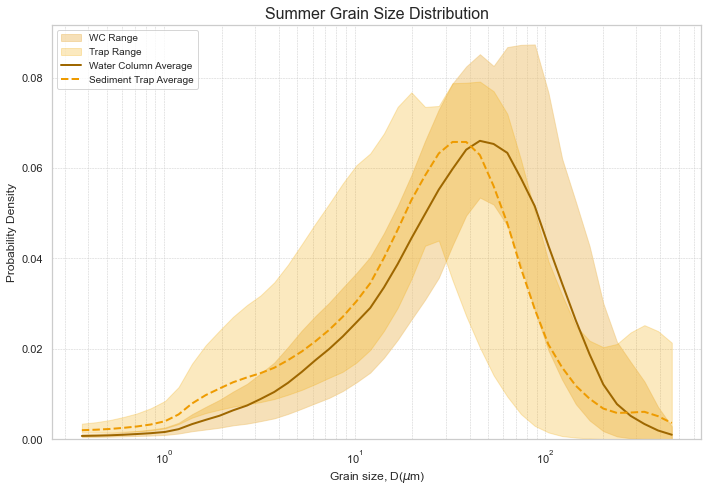

In [68]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SM['min'], water_SM['max'], color="#EEC372", alpha=0.5, label='WC Range')
ax.fill_between(grain_sizes, trap_SM['min'], trap_SM['max'], color="#F2A900", alpha=0.25, label='Trap Range')

# Plot the average lines
ax.plot(grain_sizes, water_SM['avg'], color="#9E6700", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SM['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Summer Grain Size Distribution', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Standard Deviation

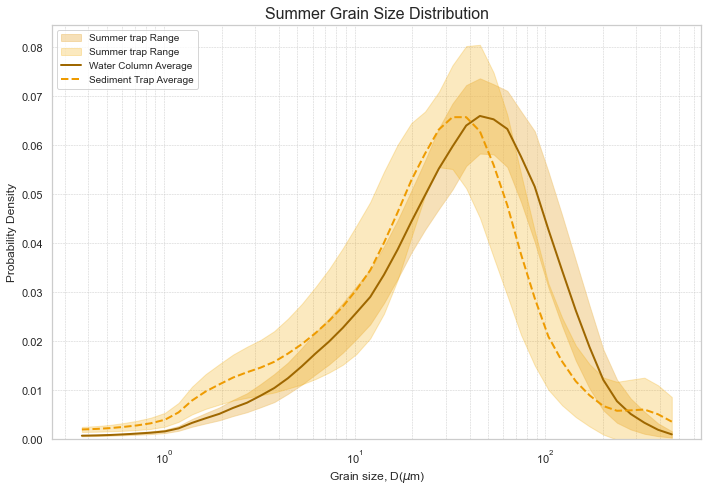

In [69]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SM['avg']-water_SM['std'], water_SM['avg']+ water_SM['std'], color="#EEC372", alpha=0.5, label='Summer trap Range')
ax.fill_between(grain_sizes, trap_SM['avg']-trap_SM['std'], trap_SM['avg']+trap_SM['std'], color="#F2A900", alpha=0.25, label='Summer trap Range')
# Plot the average lines
ax.plot(grain_sizes, water_SM['avg'], color="#9E6700", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SM['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Summer Grain Size Distribution', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Percentiles

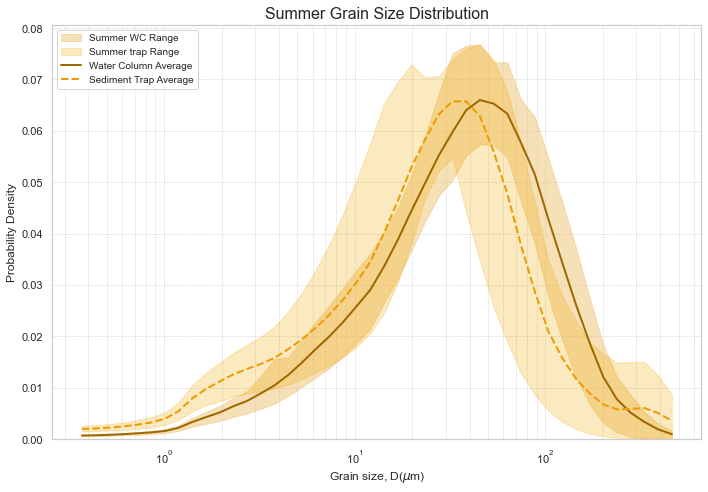

In [60]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SM['d10'], water_SM['d90'], color="#EEC372", alpha=0.5, label='Summer WC Range')
ax.fill_between(grain_sizes, trap_SM['d10'], trap_SM['d90'], color="#F2A900", alpha=0.25, label='Summer trap Range')

# Plot the average lines
ax.plot(grain_sizes, water_SM['avg'], color="#9E6700", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SM['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Summer Grain Size Distribution', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Both Seasons

Min and Max

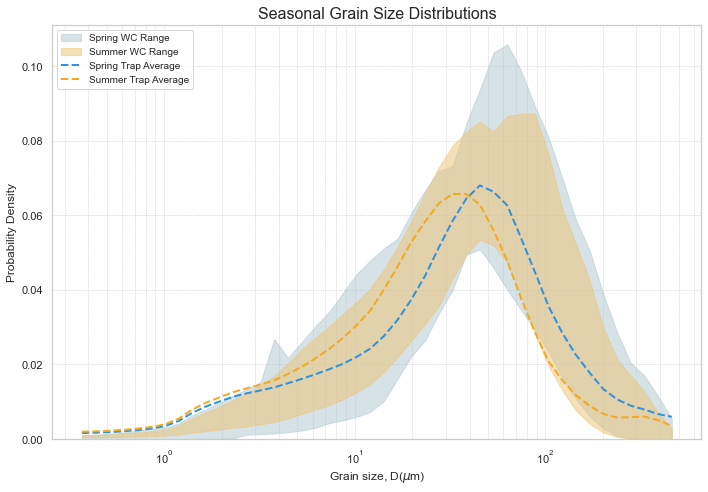

In [70]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP['min'], water_SP['max'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, water_SM['min'], water_SM['max'], color="#EEC372", alpha=0.5, label='Summer WC Range')

# plot the average lines
#ax.plot(grain_sizes, water_SP['avg'], color="#0060A5", linewidth=2, label='Spring WC Average')
ax.plot(grain_sizes, trap_SP['avg'], color="#2F92DA", linewidth=2, linestyle='--', label='Spring Trap Average')
#ax.plot(grain_sizes, water_SM['avg'], color="#B37607", linewidth=2, label='Summer WC Average')
ax.plot(grain_sizes, trap_SM['avg'], color="#F3AA22", linewidth=2, linestyle='--', label='Summer Trap Average')

ax.set_title('Seasonal Grain Size Distributions', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Standard Deviation

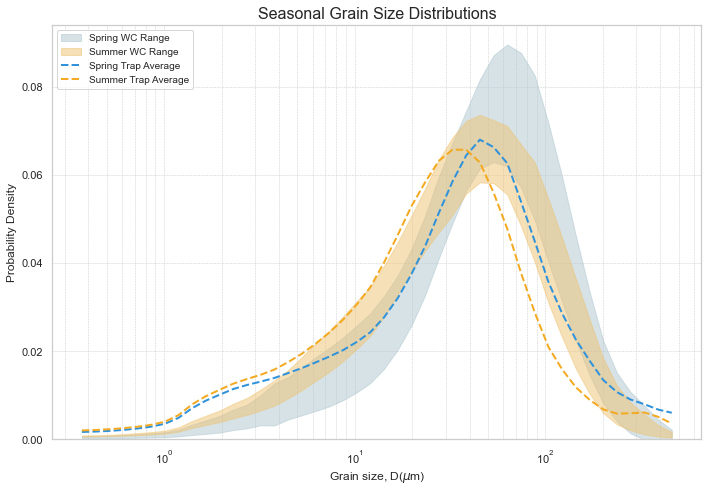

In [71]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP['avg']-water_SP['std'], water_SP['avg']+ water_SP['std'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, water_SM['avg']-water_SM['std'], water_SM['avg']+ water_SM['std'], color="#EEC372", alpha=0.5, label='Summer WC Range')

# plot the average lines
#ax.plot(grain_sizes, water_SP['avg'], color="#0060A5", linewidth=2, label='Spring WC Average')
ax.plot(grain_sizes, trap_SP['avg'], color="#2F92DA", linewidth=2, linestyle='--', label='Spring Trap Average')
#ax.plot(grain_sizes, water_SM['avg'], color="#B37607", linewidth=2, label='Summer WC Average')
ax.plot(grain_sizes, trap_SM['avg'], color="#F3AA22", linewidth=2, linestyle='--', label='Summer Trap Average')

ax.set_title('Seasonal Grain Size Distributions', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Percentiles

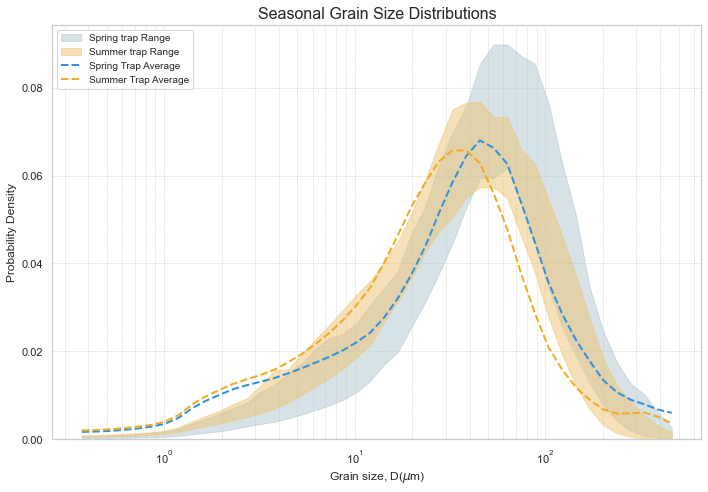

In [56]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP['d10'], water_SP['d90'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, water_SM['d10'], water_SM['d90'], color="#EEC372", alpha=0.5, label='Summer WC Range')

# plot the average lines
#ax.plot(grain_sizes, water_SP['avg'], color="#0060A5", linewidth=2, label='Spring WC Average')
ax.plot(grain_sizes, trap_SP['avg'], color="#2F92DA", linewidth=2, linestyle='--', label='Spring Trap Average')
#ax.plot(grain_sizes, water_SM['avg'], color="#B37607", linewidth=2, label='Summer WC Average')
ax.plot(grain_sizes, trap_SM['avg'], color="#F3AA22", linewidth=2, linestyle='--', label='Summer Trap Average')

ax.set_title('Seasonal Grain Size Distributions', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### Plotting CDFs

CDF calculations

In [84]:
# transforming all PDF data to CDF 
# Use axis=0 to cumsum down the rows (across grain sizes) for each sample
water_SM_cdf_array = water_SM_array.cumsum(axis=0)
trap_SM_cdf_array = trap_SM_array.cumsum(axis=0)
water_SP_cdf_array = water_SP_array.cumsum(axis=0)
trap_SP_cdf_array = trap_SP_array.cumsum(axis=0)

# create DataFrames with grain sizes as the first column
water_SM_cdf = pd.DataFrame(water_SM_cdf_array, columns=water_SM.columns[1:])  # skip first column name
water_SM_cdf.insert(0, water_SM.columns[0], grain_sizes)  # insert grain sizes as first column
water_SP_cdf = pd.DataFrame(water_SP_cdf_array, columns=water_SP.columns[1:])
water_SP_cdf.insert(0, water_SP.columns[0], grain_sizes)
trap_SM_cdf = pd.DataFrame(trap_SM_cdf_array, columns=trap_SM.columns[1:])
trap_SM_cdf.insert(0, trap_SM.columns[0], grain_sizes)
trap_SP_cdf = pd.DataFrame(trap_SP_cdf_array, columns=trap_SP.columns[1:])
trap_SP_cdf.insert(0, trap_SP.columns[0], grain_sizes)

In [85]:
# calculating max, avg and min GSDs of the water columns
spring_wc_gsd_max = pd.DataFrame(np.max(water_SP_cdf_array, axis=1))
spring_wc_gsd_avg = pd.DataFrame(np.mean(water_SP_cdf_array, axis=1))
spring_wc_gsd_min = pd.DataFrame(np.min(water_SP_cdf_array, axis=1))
summer_wc_gsd_max = pd.DataFrame(np.max(water_SM_cdf_array, axis=1))
summer_wc_gsd_avg = pd.DataFrame(np.mean(water_SM_cdf_array, axis=1))
summer_wc_gsd_min = pd.DataFrame(np.min(water_SM_cdf_array, axis=1))
# calculating max, avg and min GSDs of the baskets
spring_st_gsd_max = pd.DataFrame(np.max(trap_SP_cdf_array, axis=1))
spring_st_gsd_avg = pd.DataFrame(np.mean(trap_SP_cdf_array, axis=1))
spring_st_gsd_min = pd.DataFrame(np.min(trap_SP_cdf_array, axis=1))
summer_st_gsd_max = pd.DataFrame(np.max(trap_SM_cdf_array, axis=1))
summer_st_gsd_avg = pd.DataFrame(np.mean(trap_SM_cdf_array, axis=1))
summer_st_gsd_min = pd.DataFrame(np.min(trap_SM_cdf_array, axis=1))

# calculating standard deviations of water columns and traps
spring_wc_gsd_std = pd.DataFrame(np.std(water_SP_cdf_array, axis=1))
summer_wc_gsd_std = pd.DataFrame(np.std(water_SM_cdf_array, axis=1))
spring_st_gsd_std = pd.DataFrame(np.std(trap_SP_cdf_array, axis=1))
summer_st_gsd_std = pd.DataFrame(np.std(trap_SM_cdf_array, axis=1))

# calculating percentiles of the water columns 
spring_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SP_cdf_array, 90, axis=1))
spring_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SP_cdf_array, 10, axis=1))
summer_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SM_cdf_array, 90, axis=1))
summer_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SM_cdf_array, 10, axis=1))
# calculating percentiles of the sediment traps
spring_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SP_cdf_array, 90, axis=1))
spring_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SP_cdf_array, 10, axis=1))
summer_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SM_cdf_array, 90, axis=1))
summer_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SM_cdf_array, 10, axis=1))


In [86]:
# add max, avg, std and min GSDs to the dataframes as new columns
water_SP_cdf["max"] = spring_wc_gsd_max
water_SP_cdf["avg"] = spring_wc_gsd_avg
water_SP_cdf["min"] = spring_wc_gsd_min
water_SP_cdf["std"] = spring_wc_gsd_std
water_SM_cdf["max"] = summer_wc_gsd_max
water_SM_cdf["avg"] = summer_wc_gsd_avg
water_SM_cdf["min"] = summer_wc_gsd_min
water_SM_cdf["std"] = summer_wc_gsd_std

trap_SP_cdf['max'] = spring_st_gsd_max
trap_SP_cdf['avg'] = spring_st_gsd_avg
trap_SP_cdf['min'] = spring_st_gsd_min
trap_SP_cdf['std'] = spring_st_gsd_std
trap_SM_cdf['max'] = summer_st_gsd_max
trap_SM_cdf['avg'] = summer_st_gsd_avg
trap_SM_cdf['min'] = summer_st_gsd_min
trap_SM_cdf['std'] = summer_st_gsd_std

# adding the percentiles to the dataframes as well
water_SP_cdf['d90'] = spring_wc_gsd_d90
water_SP_cdf['d10'] = spring_wc_gsd_d10
water_SM_cdf['d90'] = summer_wc_gsd_d90
water_SM_cdf['d10'] = summer_wc_gsd_d10
trap_SP_cdf['d90'] = spring_st_gsd_d90
trap_SP_cdf['d10'] = spring_st_gsd_d10
trap_SM_cdf['d90'] = summer_st_gsd_d90
trap_SM_cdf['d10'] = summer_st_gsd_d10

In [ ]:
# loop to delete all variables that start with "summer" and "spring" and end with "array"
for var in list(globals().keys()):
    if var.startswith("summer") or var.startswith("spring"):
        del globals()[var]
    if var.endswith('array'):
        del globals()[var]

#### Spring

Min and Max

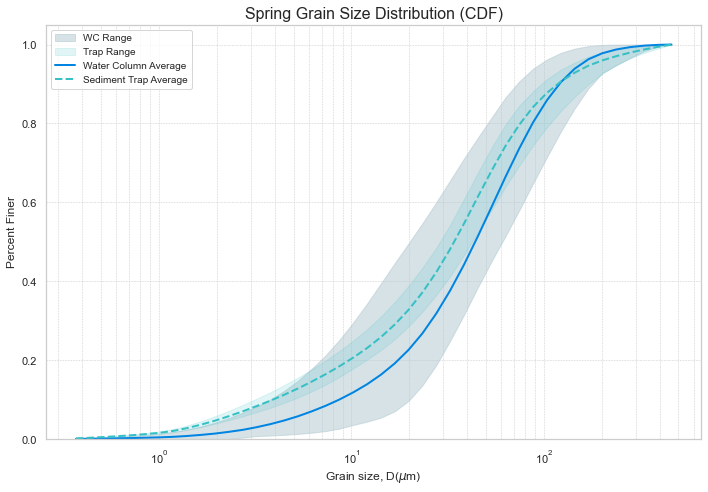

In [89]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP_cdf['min'], water_SP_cdf['max'], color='#AEC6CF', alpha=0.5, label='WC Range')
ax.fill_between(grain_sizes, trap_SP_cdf['min'], trap_SP_cdf['max'], color="#36C0C5", alpha=0.15, label='Trap Range')

# plot the average lines
ax.plot(grain_sizes, water_SP_cdf['avg'], color="#0084E2", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SP_cdf['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Spring Grain Size Distribution (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Percent Finer', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Standard Deviation

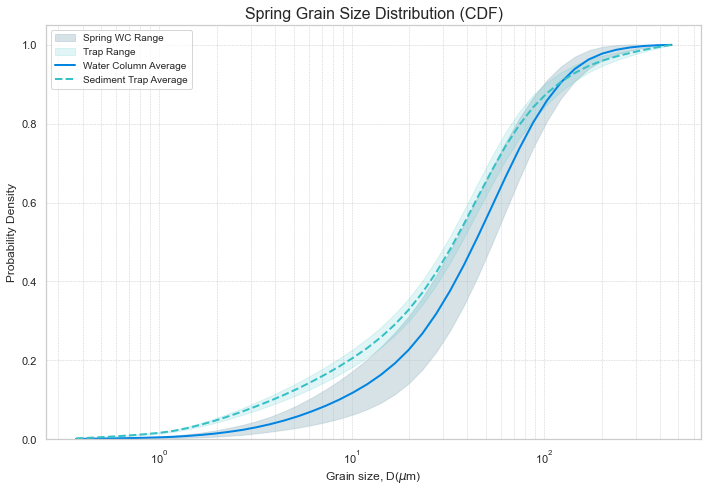

In [90]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# range is standard deviation
ax.fill_between(grain_sizes, water_SP_cdf['avg']-water_SP_cdf['std'], water_SP_cdf['avg']+ water_SP_cdf['std'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, trap_SP_cdf['avg']-trap_SP_cdf['std'], trap_SP_cdf['avg']+trap_SP_cdf['std'], color="#36C0C5", alpha=0.15, label='Trap Range')
# plot the average lines
ax.plot(grain_sizes, water_SP_cdf['avg'], color="#0084E2", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SP_cdf['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Spring Grain Size Distribution (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Percentiles

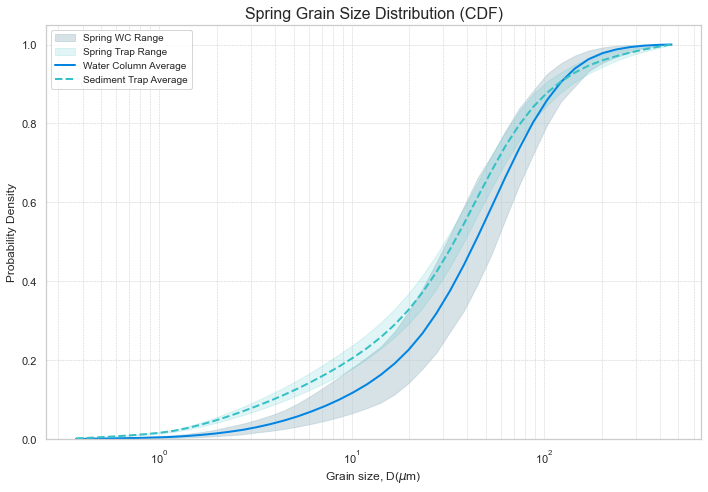

In [91]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# range is standard deviation
ax.fill_between(grain_sizes, water_SP_cdf['d10'], water_SP_cdf['d90'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, trap_SP_cdf['d10'], trap_SP_cdf['d90'], color="#36C0C5", alpha=0.15, label='Spring Trap Range')
# plot the average lines
ax.plot(grain_sizes, water_SP_cdf['avg'], color="#0084E2", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SP_cdf['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Spring Grain Size Distribution (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Summer

Min and Max

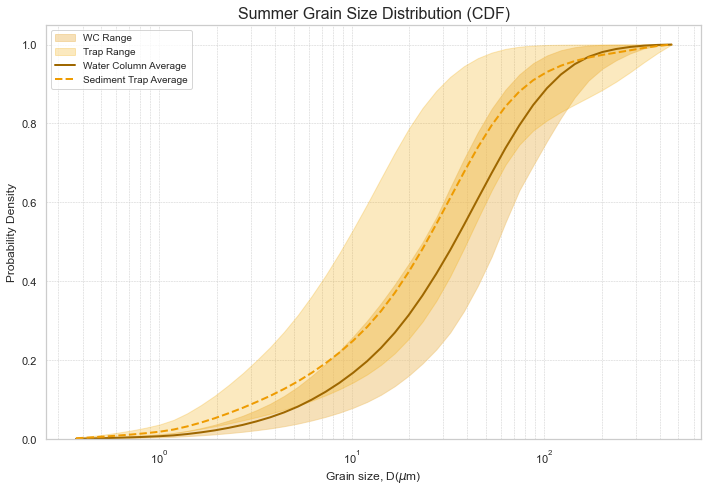

In [92]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SM_cdf['min'], water_SM_cdf['max'], color="#EEC372", alpha=0.5, label='WC Range')
ax.fill_between(grain_sizes, trap_SM_cdf['min'], trap_SM_cdf['max'], color="#F2A900", alpha=0.25, label='Trap Range')

# Plot the average lines
ax.plot(grain_sizes, water_SM_cdf['avg'], color="#9E6700", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SM_cdf['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Summer Grain Size Distribution (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Standard Deviation

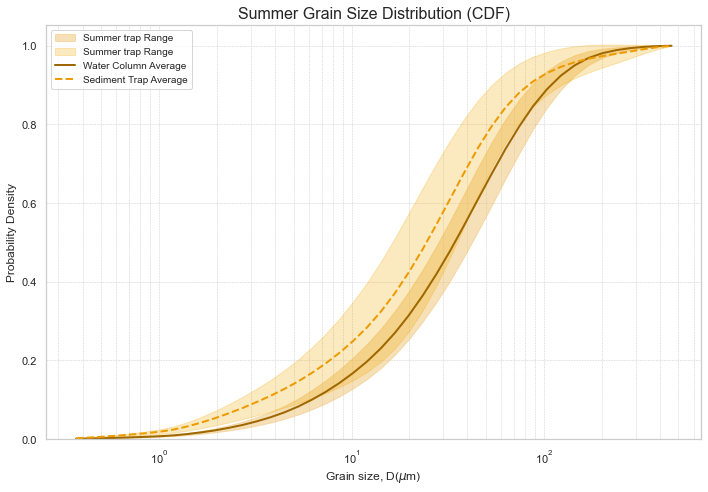

In [93]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SM_cdf['avg']-water_SM_cdf['std'], water_SM_cdf['avg']+ water_SM_cdf['std'], color="#EEC372", alpha=0.5, label='Summer trap Range')
ax.fill_between(grain_sizes, trap_SM_cdf['avg']-trap_SM_cdf['std'], trap_SM_cdf['avg']+trap_SM_cdf['std'], color="#F2A900", alpha=0.25, label='Summer trap Range')
# Plot the average lines
ax.plot(grain_sizes, water_SM_cdf['avg'], color="#9E6700", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SM_cdf['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Summer Grain Size Distribution (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Percentiles

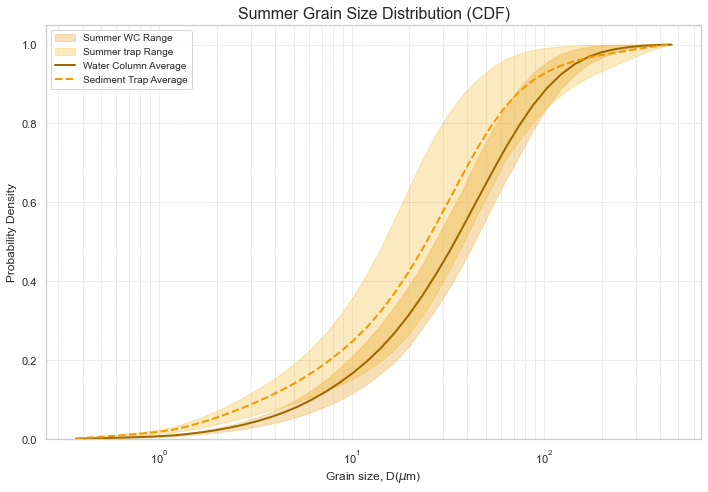

In [94]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SM_cdf['d10'], water_SM_cdf['d90'], color="#EEC372", alpha=0.5, label='Summer WC Range')
ax.fill_between(grain_sizes, trap_SM_cdf['d10'], trap_SM_cdf['d90'], color="#F2A900", alpha=0.25, label='Summer trap Range')

# Plot the average lines
ax.plot(grain_sizes, water_SM_cdf['avg'], color="#9E6700", linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SM_cdf['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Sediment Trap Average')

ax.set_title('Summer Grain Size Distribution (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Both Seasons

Min and Max

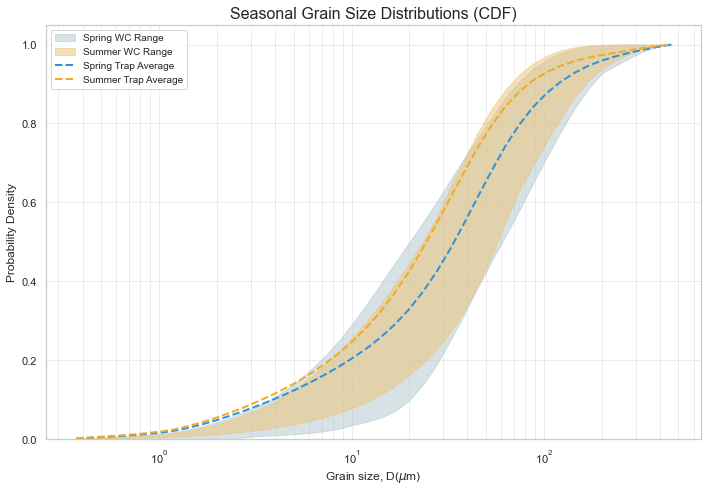

In [95]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP_cdf['min'], water_SP_cdf['max'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, water_SM_cdf['min'], water_SM_cdf['max'], color="#EEC372", alpha=0.5, label='Summer WC Range')

# plot the average lines
#ax.plot(grain_sizes, water_SP_cdf['avg'], color="#0060A5", linewidth=2, label='Spring WC Average')
ax.plot(grain_sizes, trap_SP_cdf['avg'], color="#2F92DA", linewidth=2, linestyle='--', label='Spring Trap Average')
#ax.plot(grain_sizes, water_SM_cdf['avg'], color="#B37607", linewidth=2, label='Summer WC Average')
ax.plot(grain_sizes, trap_SM_cdf['avg'], color="#F3AA22", linewidth=2, linestyle='--', label='Summer Trap Average')

ax.set_title('Seasonal Grain Size Distributions (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Standard Deviation

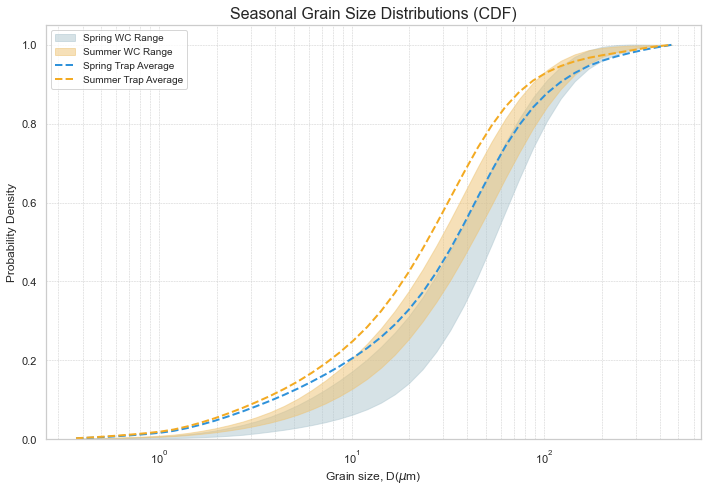

In [98]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP_cdf['avg']-water_SP_cdf['std'], water_SP_cdf['avg']+ water_SP_cdf['std'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, water_SM_cdf['avg']-water_SM_cdf['std'], water_SM_cdf['avg']+ water_SM_cdf['std'], color="#EEC372", alpha=0.5, label='Summer WC Range')

# plot the average lines
#ax.plot(grain_sizes, water_SP_cdf['avg'], color="#0060A5", linewidth=2, label='Spring WC Average')
ax.plot(grain_sizes, trap_SP_cdf['avg'], color="#2F92DA", linewidth=2, linestyle='--', label='Spring Trap Average')
#ax.plot(grain_sizes, water_SM_cdf['avg'], color="#B37607", linewidth=2, label='Summer WC Average')
ax.plot(grain_sizes, trap_SM_cdf['avg'], color="#F3AA22", linewidth=2, linestyle='--', label='Summer Trap Average')

ax.set_title('Seasonal Grain Size Distributions (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Percentiles

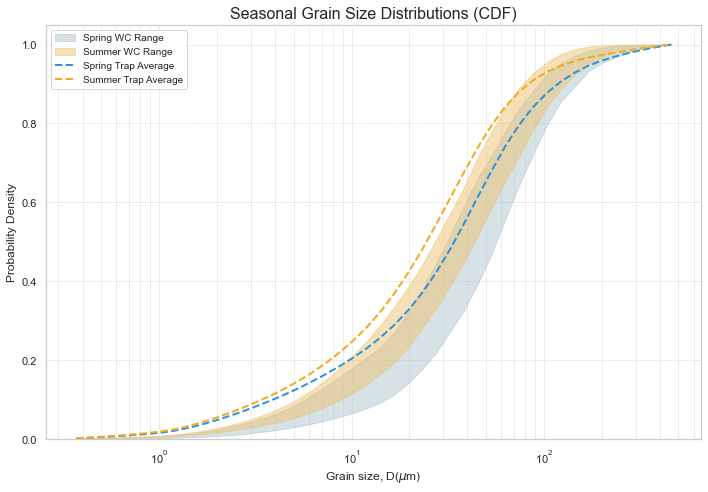

In [100]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP_cdf['d10'], water_SP_cdf['d90'], color='#AEC6CF', alpha=0.5, label='Spring WC Range')
ax.fill_between(grain_sizes, water_SM_cdf['d10'], water_SM_cdf['d90'], color="#EEC372", alpha=0.5, label='Summer WC Range')

# plot the average lines
#ax.plot(grain_sizes, water_SP_cdf['avg'], color="#0060A5", linewidth=2, label='Spring WC Average')
ax.plot(grain_sizes, trap_SP_cdf['avg'], color="#2F92DA", linewidth=2, linestyle='--', label='Spring Trap Average')
#ax.plot(grain_sizes, water_SM_cdf['avg'], color="#B37607", linewidth=2, label='Summer WC Average')
ax.plot(grain_sizes, trap_SM_cdf['avg'], color="#F3AA22", linewidth=2, linestyle='--', label='Summer Trap Average')

ax.set_title('Seasonal Grain Size Distributions (CDF)', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') 
ax.set_ylim(bottom=0) # ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### GSD Metrics

#### Jensen Shannon Distance

In [111]:
# SP trap to SP wc 
jsd_value = jensenshannon(trap_SP['avg'], water_SP['avg'])
print(f"Jensen-Shannon Divergence (SP trap to SP wc): {jsd_value: .4f}")
# SP trap to SM wc
jsd_value = jensenshannon(trap_SP['avg'], water_SM['avg'])
print(f"Jensen-Shannon Divergence (SP trap to SM wc): {jsd_value: .4f}")
# SM trap to SP wc
jsd_value = jensenshannon(trap_SM['avg'], water_SP['avg'])
print(f"Jensen-Shannon Divergence (SM trap to SP wc): {jsd_value: .4f}")
# SM trap to SM wc
jsd_value = jensenshannon(trap_SM['avg'], water_SM['avg'])
print(f"Jensen-Shannon Divergence (SM trap to SM wc): {jsd_value: .4f}")

Jensen-Shannon Divergence (SP trap to SP wc):  0.1267
Jensen-Shannon Divergence (SP trap to SM wc):  0.0851
Jensen-Shannon Divergence (SM trap to SP wc):  0.2057
Jensen-Shannon Divergence (SM trap to SM wc):  0.1324


#### Earth Mover's Distance (EMD)

In [112]:
# SP trap to SP wc 
emd = wasserstein_distance(grain_sizes, grain_sizes, trap_SP['avg'], water_SP['avg'])
print(f"Earth Mover's Distance (SP trap to SP wc): {emd:.4f}")
# SP trap to SM wc
emd = wasserstein_distance(grain_sizes, grain_sizes, trap_SP['avg'], water_SM['avg'])
print(f"Earth Mover's Distance (SP trap to SM wc): {emd:.4f}")
# SM trap to SP wc
emd = wasserstein_distance(grain_sizes, grain_sizes, trap_SM['avg'], water_SP['avg'])
print(f"Earth Mover's Distance (SM trap to SP wc): {emd:.4f}")
# SM trap to SM wc
emd = wasserstein_distance(grain_sizes, grain_sizes, trap_SM['avg'], water_SM['avg'])
print(f"Earth Mover's Distance (SM trap to SM wc): {emd:.4f}")

Earth Mover's Distance (SP trap to SP wc): 12.3147
Earth Mover's Distance (SP trap to SM wc): 6.1113
Earth Mover's Distance (SM trap to SP wc): 21.7866
Earth Mover's Distance (SM trap to SM wc): 13.3300


## Subplots

### PDFs

Max and Min

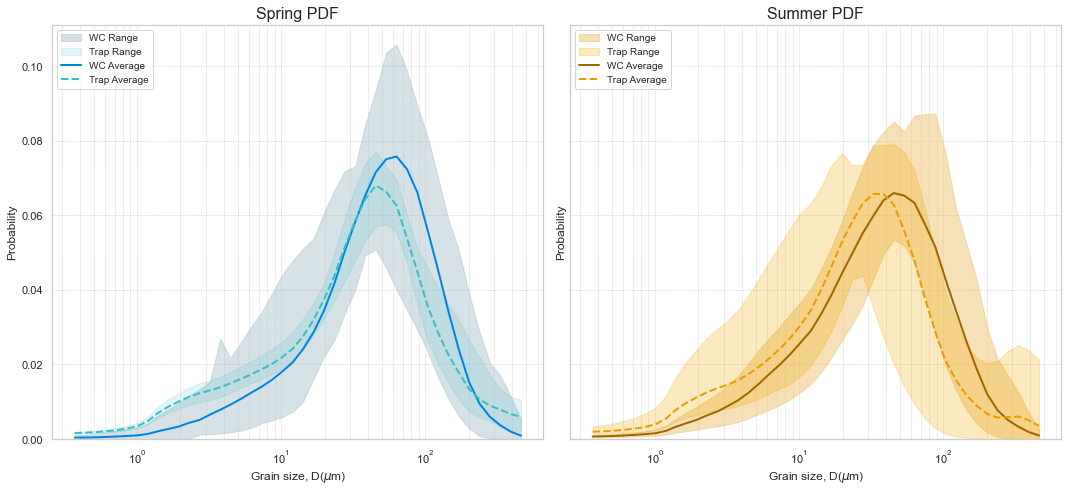

In [117]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# SPRING 
ax[0].fill_between(grain_sizes, water_SP['min'], water_SP['max'], color='#AEC6CF', alpha=0.5, label='WC Range')
ax[0].fill_between(grain_sizes, trap_SP['min'], trap_SP['max'], color="#36C0C5", alpha=0.15, label='Trap Range')
# plot the average lines
ax[0].plot(grain_sizes, water_SP['avg'], color="#0084E2", linewidth=2, label='WC Average')
ax[0].plot(grain_sizes, trap_SP['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Trap Average')
# labels
ax[0].set_title('Spring PDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# SUMMER
ax[1].fill_between(grain_sizes, water_SM['min'], water_SM['max'], color="#EEC372", alpha=0.5, label='WC Range')
ax[1].fill_between(grain_sizes, trap_SM['min'], trap_SM['max'], color="#F2A900", alpha=0.25, label='Trap Range')
# plot the average lines
ax[1].plot(grain_sizes, water_SM['avg'], color="#9E6700", linewidth=2, label='WC Average')
ax[1].plot(grain_sizes, trap_SM['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Trap Average')
# labels
ax[1].set_title('Summer PDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Standard Deviation

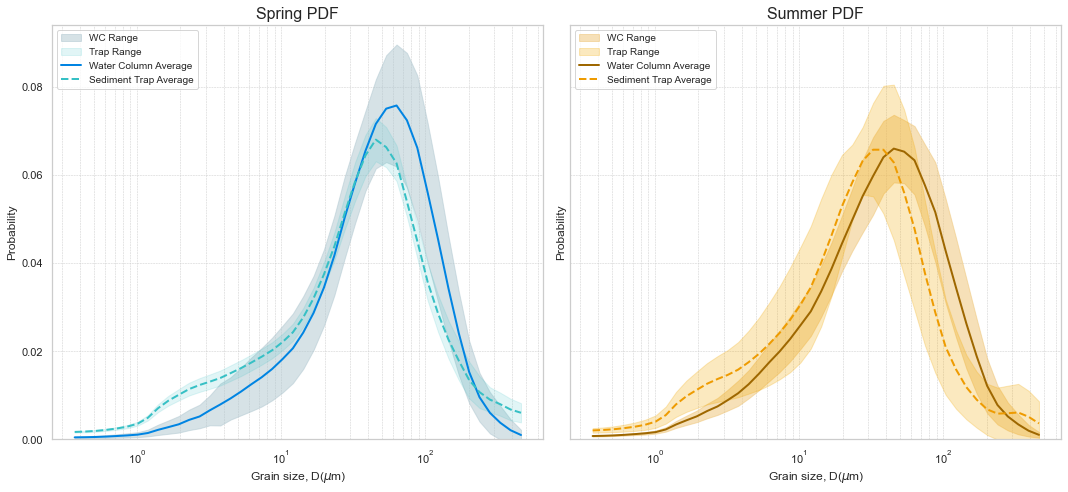

In [118]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# SPRING 
ax[0].fill_between(grain_sizes, water_SP['avg']-water_SP['std'], water_SP['avg']+ water_SP['std'], color='#AEC6CF', alpha=0.5, label='WC Range')
ax[0].fill_between(grain_sizes, trap_SP['avg']-trap_SP['std'], trap_SP['avg']+trap_SP['std'], color="#36C0C5", alpha=0.15, label='Trap Range')
# plot the average lines
ax[0].plot(grain_sizes, water_SP['avg'], color="#0084E2", linewidth=2, label='Water Column Average')
ax[0].plot(grain_sizes, trap_SP['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Sediment Trap Average')
# labels
ax[0].set_title('Spring PDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# SUMMER
ax[1].fill_between(grain_sizes, water_SM['avg']-water_SM['std'], water_SM['avg']+ water_SM['std'], color="#EEC372", alpha=0.5, label='WC Range')
ax[1].fill_between(grain_sizes, trap_SM['avg']-trap_SM['std'], trap_SM['avg']+trap_SM['std'], color="#F2A900", alpha=0.25, label='Trap Range')
# plot the average lines
ax[1].plot(grain_sizes, water_SM['avg'], color="#9E6700", linewidth=2, label='Water Column Average')
ax[1].plot(grain_sizes, trap_SM['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Sediment Trap Average')
# labels
ax[1].set_title('Summer PDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Percentiles

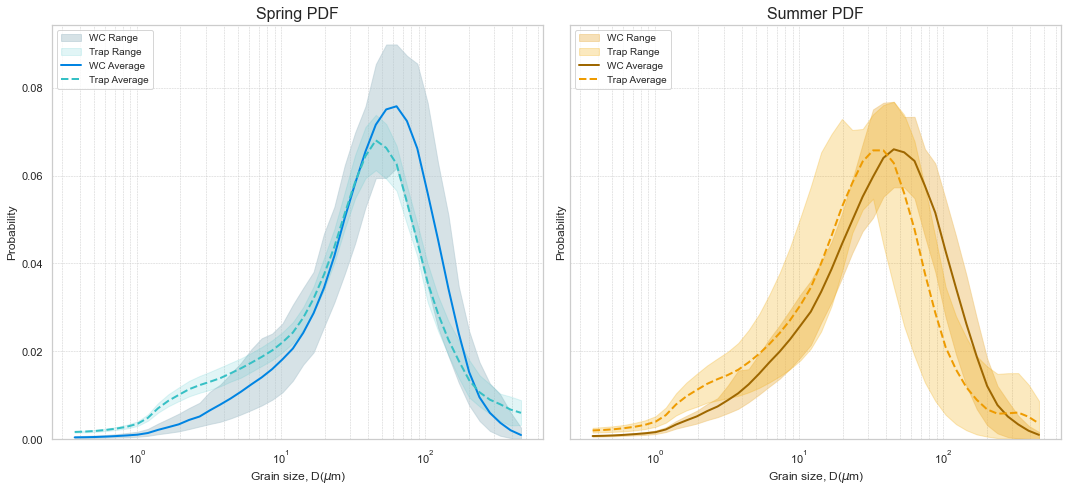

In [121]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# SPRING 
ax[0].fill_between(grain_sizes, water_SP['d10'], water_SP['d90'], color='#AEC6CF', alpha=0.5, label='WC Range')
ax[0].fill_between(grain_sizes, trap_SP['d10'], trap_SP['d90'], color="#36C0C5", alpha=0.15, label='Trap Range')
# plot the average lines
ax[0].plot(grain_sizes, water_SP['avg'], color="#0084E2", linewidth=2, label='WC Average')
ax[0].plot(grain_sizes, trap_SP['avg'], color="#36C0C5", linewidth=2, linestyle='--', label='Trap Average')
# labels
ax[0].set_title('Spring PDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# SUMMER
ax[1].fill_between(grain_sizes, water_SM['d10'], water_SM['d90'], color="#EEC372", alpha=0.5, label='WC Range')
ax[1].fill_between(grain_sizes, trap_SM['d10'], trap_SM['d90'], color="#F2A900", alpha=0.25, label='Trap Range')
# plot the average lines
ax[1].plot(grain_sizes, water_SM['avg'], color="#9E6700", linewidth=2, label='WC Average')
ax[1].plot(grain_sizes, trap_SM['avg'], color="#EE9B01", linewidth=2, linestyle='--', label='Trap Average')
# labels
ax[1].set_title('Summer PDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### CDFs

Max and Min

Standard Deviation

Percentiles